### 1. NOTES ON OPERATION OF THE NOTEBOOK

In this notebook, we will employed supervised learning (regression model) to predict the prices of house from Bengaluru, India house prices.
It is quite important to follow through on the steps to achieve the aim of learning how to build the model.

### 2a. IMPORT DEPENDENCIES AND PACKAGES

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20, 10)

### 2b. IMPORT DATASET

In [2]:
house_df = pd.read_csv(r'C:\Users\User\Documents\Coding\Datasets\Bengaluru_House_Data.csv')
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### 3. GENERAL VIEW OF DATASETS

In [4]:
# display the last five rows
house_df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
house_df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# display quick stat view of  
house_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
# display uniqque values of each columns
house_df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [8]:
# display the number of where 'na' is empty
house_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### `GENERAL EXPLORE OF COLUMNS`

In [9]:
# df.drop() will drop columns OR rows,
# dropna() will drop any row with empty row
house_df1 = house_df.drop(['availability', 'society', 'balcony', 'area_type'], 
                          axis='columns')

In [10]:
house_df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


#### `EXPLORE THE SIZE COLUMN`

In [11]:
# display the 'size' columns and transform the valuesso that are of same unit
house_df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# apply the replace extract method
house_df1['room-size'] = house_df1['size'].str.extract('(\d+)', expand=False)

In [13]:
house_df1.head()

,location,size,total_sqft,bath,price,room-size
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
# drop the 'size' column
house_df1.drop('size', axis=1, inplace=True)

In [15]:
house_df1

,location,total_sqft,bath,price,room-size
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [16]:
house_df1['room-size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', nan, '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [17]:
house_df1['room-size'] = house_df1['room-size'].apply(pd.to_numeric)
print(house_df1['room-size'].dtype)

float64


#### `EXPLORE THE TOTAL_SQFT COLUMN`

In [18]:
house_df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# define a function to determine if the value in total_sqft are float?
def is_float(a):
    try:
        float(a)
    except:
        return False
    return True

In [20]:
# display the values that are float
house_df1[house_df1['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,room-size
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [21]:
# dislays the values that are not float
house_df1[~house_df1['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,room-size
30,Yelahanka,2100 - 2850,4.0,186.000,4.0
56,Devanahalli,3010 - 3410,NaN,192.000,4.0
81,Hennur Road,2957 - 3450,NaN,224.500,4.0
122,Hebbal,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2.0


In [22]:
# write a fucntion that converts the values of the 'total_sqft' 
# that are not floats into becoming floats

def convert_sqft_to_num(a):
    value = a.split("-")
    if len(value) ==2:
        return(float(value[0]) + float(value[1]))/2
    try:
        return float(a)
    except:
         return None

In [23]:
# test out the function above
print(convert_sqft_to_num('1056'))
print(convert_sqft_to_num('3010 - 3410'))
print(convert_sqft_to_num('34.456Sq. Meter'))

1056.0
3210.0
None


In [24]:
# create a new dataframe to apply the function
house_df2 = house_df1.copy()
house_df2['total_sqft'] = house_df2['total_sqft'].apply(convert_sqft_to_num)
house_df2.head(2)

,location,total_sqft,bath,price,room-size
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0


In [25]:
# preview a rw using the df.loc function
house_df2.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
room-size             4
Name: 30, dtype: object

### FEATURE ENGINEERING

#### `Per per Sqaure Foot`

In [26]:
house_df3 = house_df2.copy()

In [27]:
# create a new column 'price_per_sqft' this is important to define unit price
house_df3['price_per_sqft'] = (house_df3['price']*100000/house_df3['total_sqft'])
house_df3.head()

,location,total_sqft,bath,price,room-size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [28]:
len(house_df3['location'].unique())

1306

In [29]:
# create a  function to determine the importance of each
# location on the overall location
location_stats = house_df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              540
Sarjapur  Road                          399
Electronic City                         302
Kanakpura Road                          273
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
 Anekal                                   1
Name: location, Length: 1305, dtype: int64

In [30]:
# check the number of location that has less than ten houses
len(location_stats[location_stats<= 10])

1064

In [31]:
location_stats_less_than_10 = location_stats[location_stats<= 10]
location_stats_less_than_10

location
BTM 1st Stage                           10
Basapura                                10
Ganga Nagar                             10
1st Block Koramangala                   10
Dodsworth Layout                        10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
 Anekal                                  1
Name: location, Length: 1064, dtype: int64

In [32]:
len(house_df3['location'].unique())

1306

In [33]:
house_df3['location'] = house_df3['location'].apply(lambda x: 'other_location' if x in location_stats_less_than_10 else x)
len(house_df3['location'].unique())

243

In [34]:
house_df3.head()

,location,total_sqft,bath,price,room-size,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


### OUTLIER DETECTIONS AND REMOVALS
Outliers if not well taken care of causes instabilty to our model. It may be important to look at extreme values before doing them

#### `OUTLIER DETECTION : ROOM SIZE`

In [35]:
# lets take the threshold of 300 
house_df4 = house_df3.copy()

In [36]:
# to use a threshold to determine the outliers
house_df4[house_df4['total_sqft']/house_df4['room-size']<300].head()

,location,total_sqft,bath,price,room-size,price_per_sqft
9,other_location,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6.0,10660.980810
68,other_location,1350.0,7.0,85.0,8.0,6296.296296
70,other_location,500.0,3.0,100.0,3.0,20000.000000


In [37]:
house_df4.shape

(13320, 6)

In [38]:
# the neagtion of the outliers are
house_df5 = house_df4[~(house_df4['total_sqft']/house_df4['room-size']<300)]
house_df5.shape

(12576, 6)

#### `REMOVE OUTLIERS : PRICE_PER_SQUARE_FOOT`

In [39]:
# removing outliers for price columns
house_df5['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
# a function to remove outliers in the price_per_sqft columns
def ppsqft_outliers(house_df):
    outlier_df = pd.DataFrame()
    for key, place_df in house_df.groupby('location'):
        m = np.mean(place_df['price_per_sqft'])
        std = np.std(place_df['price_per_sqft'])
        reduced_df = place_df[(place_df['price_per_sqft']>(m - std)) & (place_df['price_per_sqft']<(m + std))]
        outlier_df = pd.concat([outlier_df, reduced_df], ignore_index=True)
    return outlier_df


house_df6 = ppsqft_outliers(house_df5)
house_df6.shape

(10303, 6)

#### `REMOVE OUTLIERS: WITH PRICE ANALYSIS`

In [41]:
# create a function to describe the location diff in prices btw 2 & 3 bedroom

def plot_scatter_plot(house_df, location):
    two_bedroom = house_df[(house_df['location'] == location) & (house_df['room-size'] ==2)]
    three_bedroom = house_df[(house_df['location'] == location) & (house_df['room-size'] ==3)]
    plt.scatter(two_bedroom['total_sqft'], two_bedroom['price'], color='orange', label='2-BD', s= 50)
    plt.scatter(three_bedroom['total_sqft'], three_bedroom['price'], marker='+', color='green', label='3-BD', s= 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

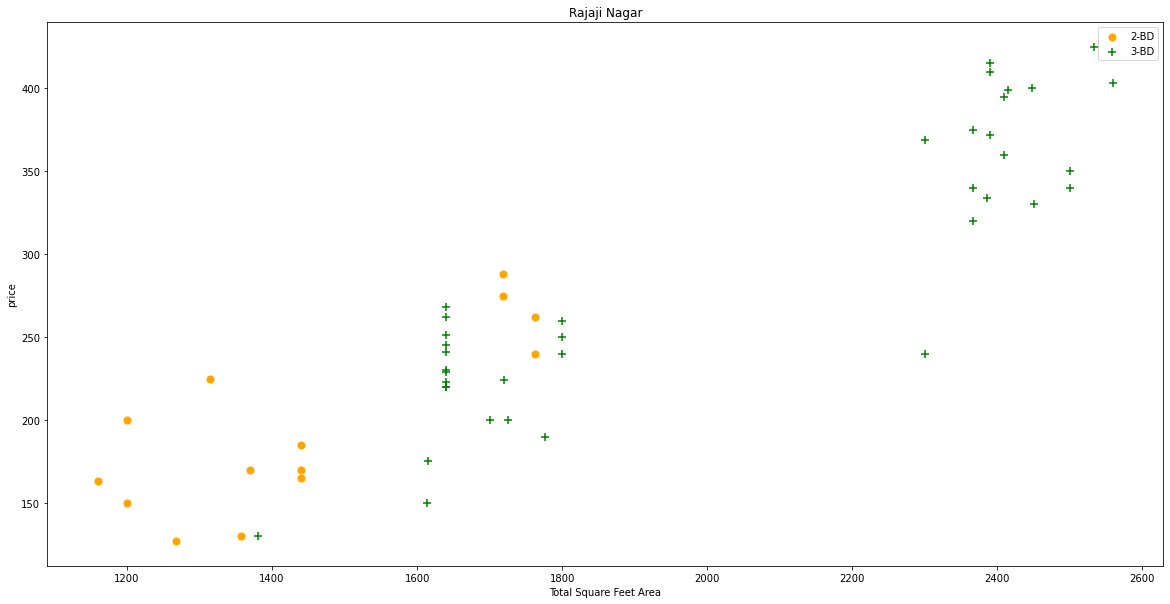

In [42]:
plot_scatter_plot(house_df6, 'Rajaji Nagar')

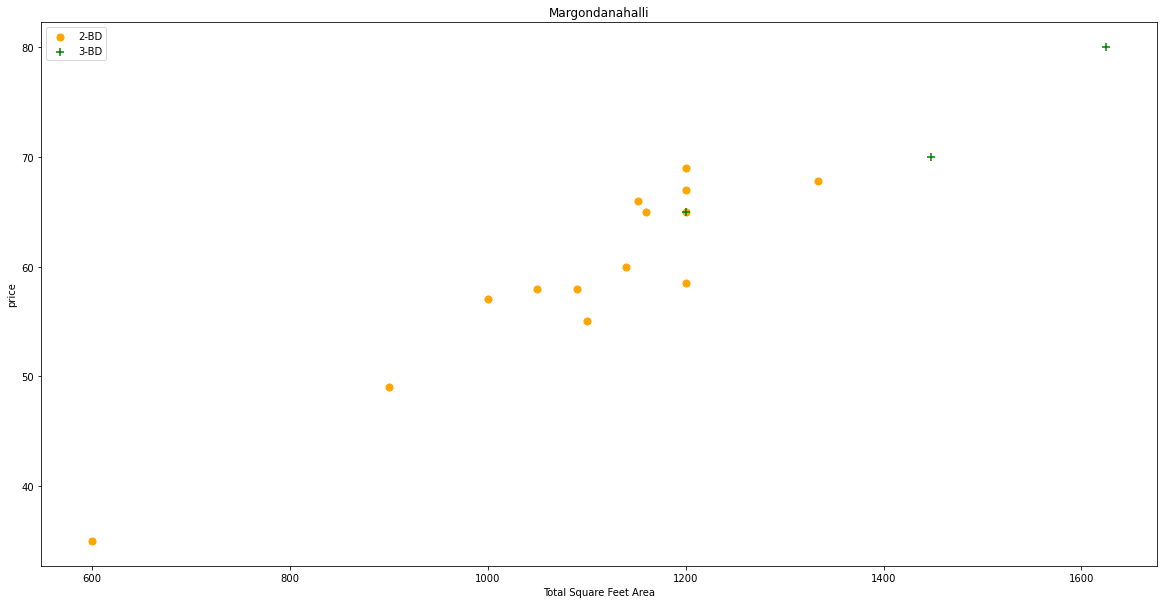

In [43]:
plot_scatter_plot(house_df6, 'Margondanahalli')

In [47]:
# function to  remove 2-bedroom apartment whose price is less
# than mean price_per_sqft of 1-bedroom apartment.
def room_size_outliers(house_df):
    excluded_rooms = np.array([])
    for location, location_df in house_df.groupby('location'):
        room_stats = {}
        for room_size, room_size_df in location_df.groupby('room-size'):
            room_stats[room_size] = {
                'mean': np.mean(room_size_df['price_per_sqft']),
                'std': np.std(room_size_df['price_per_sqft']),
                'count': room_size_df.shape[0]
            }
        for room_size, room_size_df in location_df.groupby('room-size'):
            normal_room = room_stats.get(room_size - 1)
            if normal_room and normal_room['count']>5:
                excluded_rooms = np.append(excluded_rooms, room_size_df[room_size_df['price_per_sqft']<(normal_room['mean'])].index.values)
    return house_df.drop(excluded_rooms, axis='index')

house_df7 = room_size_outliers(house_df6)
house_df7.shape

(7374, 6)

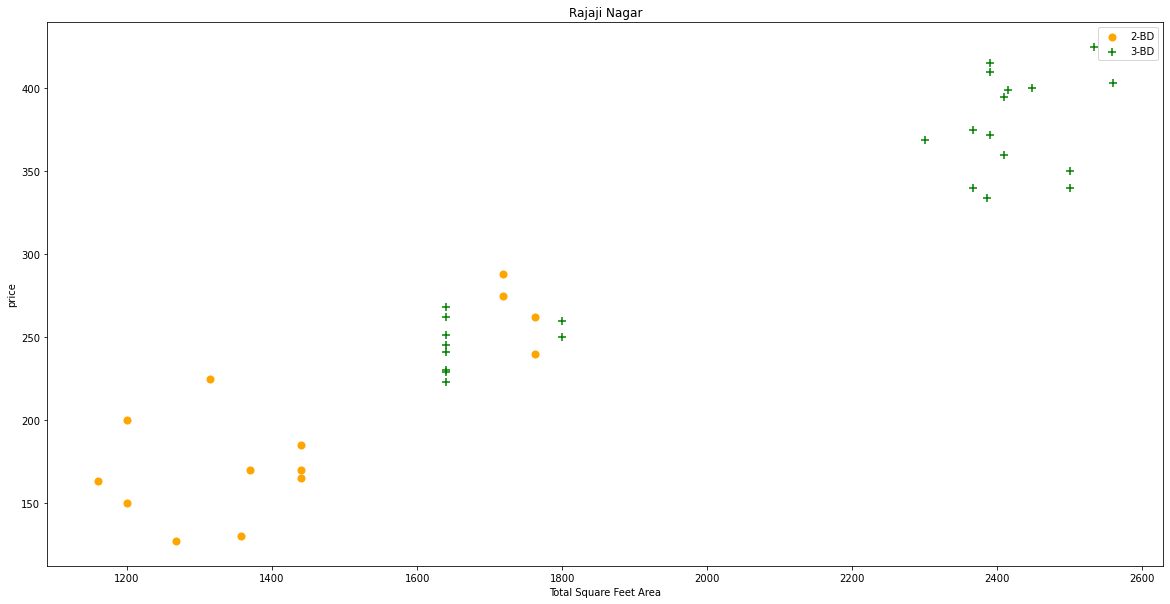

In [49]:
# visulise the new plot after cleaning
plot_scatter_plot(house_df7, 'Rajaji Nagar')

#### `VISUALISE THE OUTCOMES OF THE ABOVE`

Text(0, 0.5, 'Count')

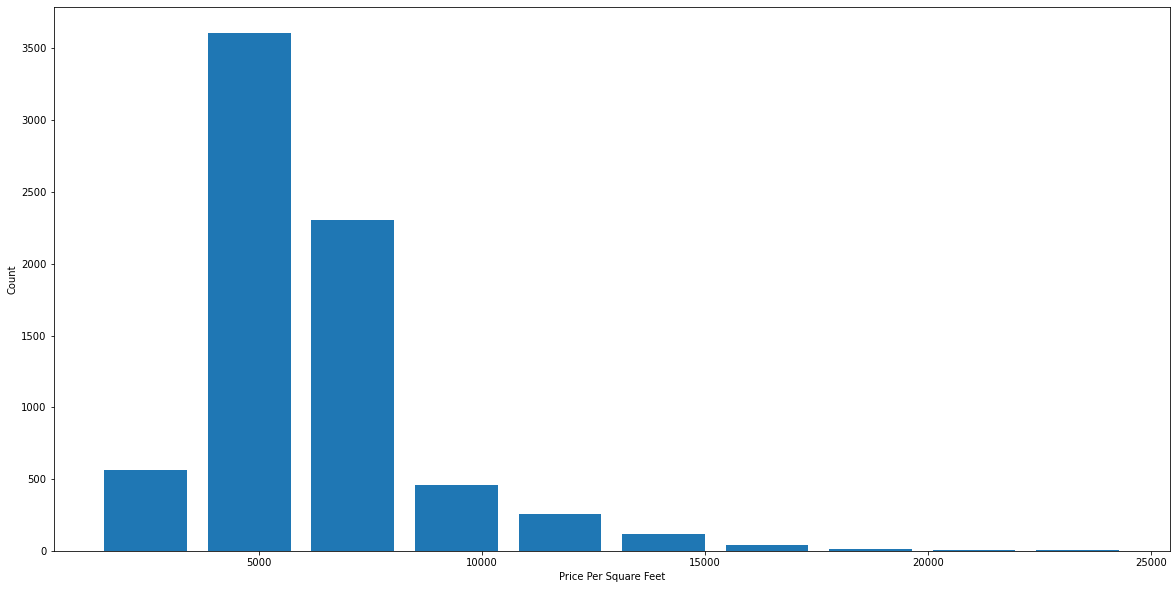

In [50]:
plt.hist(house_df7['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [51]:
# explore the bathroom columns before visualising
house_df7['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [52]:
house_df7[house_df7['bath']>10]

,location,total_sqft,bath,price,room-size,price_per_sqft
5307,Neeladri Nagar,4000.0,12.0,160.0,10.0,4000.000000
8537,other_location,12000.0,12.0,525.0,10.0,4375.000000
8626,other_location,10000.0,16.0,550.0,16.0,5500.000000
9365,other_location,6000.0,12.0,150.0,11.0,2500.000000
9698,other_location,5425.0,13.0,275.0,13.0,5069.124424


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'count')

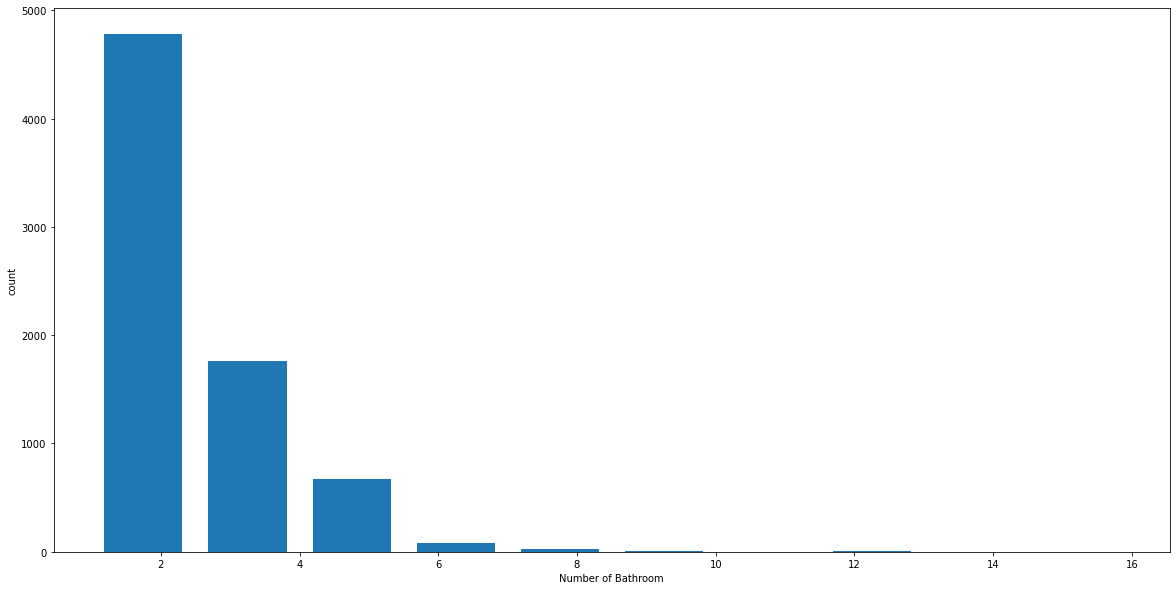

In [53]:
plt.hist(house_df7['bath'], rwidth =0.75)
plt.xlabel('Number of Bathroom')
plt.ylabel('count')

Further visualisation into bathroom per room shows that if the bathroom is more +2 the number of room-size then its is an outlier

In [54]:
house_df7[house_df7['bath']>house_df7['room-size']+2]

,location,total_sqft,bath,price,room-size,price_per_sqft
1648,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5268,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
6750,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
8461,other_location,11338.0,9.0,1000.0,6.0,8819.897689


In [55]:
#remove this unnecessary outliers
house_df8 = house_df7[house_df7['bath']<house_df7['room-size']+2]
house_df8.shape

(7258, 6)

In [56]:
#drop the unecessary data columns
house_df8.drop('price_per_sqft', axis=1, inplace=True)
house_df8.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,total_sqft,bath,price,room-size
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0


In [57]:
house_df9 = house_df8.copy()
house_df9.head(3)

,location,total_sqft,bath,price,room-size
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0


### MODEL BUILDING 

#### `USE ONE HOT-ENCODINGTO TRANSFORM THE DIFFERENT LOCATIONS`

In [58]:
# use one hot encoding to transform the diffferent locations
house_df10 = pd.get_dummies(house_df9['location'])
house_df10.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other_location
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
house_df11 = pd.concat([house_df9, house_df10.drop('other_location', axis=1)], axis=1)
house_df11.head(2)

,location,total_sqft,bath,price,room-size,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# drop the location columns from the maindata frame
house_df12 = house_df11.drop('location', axis=1)
house_df12.head(2)

,total_sqft,bath,price,room-size,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### `MODEL BUIILDING`

In [66]:
# check the shape of thre dataframe
house_df12.shape

(7258, 245)

In [61]:

X = house_df12.drop('price', axis=1)
Y = house_df12['price']

#### 'IMPORT THE TRAIN_TEST_SPLIT

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

#### `IMPORT THE LINEAR MODEL REGRESSION`

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [72]:
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8832066053935843

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.88320661, 0.84373356, 0.84653366, 0.80124935, 0.84957702])

#### `USING GRID SEARCH CV`

In [94]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def the_best_model_using_gridsearchcv(X,Y):
    algos ={
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                    'normalize': [True, False]
            }
        },
        
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter':  ['best', 'random']
            }
        }
    }
    
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
    for alogs, config in algos.items():
        grader = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        grader.fit(X,Y)
        scores.append({
            'model': algos,
            'best_score': grader.best_score_,
            'best_parmas': grader.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_socre', 'best_params'])

the_best_model_using_gridsearchcv(X, Y)

,model,best_socre,best_params
0,{'linear_regression': {'model': LinearRegressi...,NaN,NaN
1,{'linear_regression': {'model': LinearRegressi...,NaN,NaN
2,{'linear_regression': {'model': LinearRegressi...,NaN,NaN


In [104]:
X.columns

Index(['total_sqft', 'bath', 'room-size', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [105]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

4

In [116]:
# this function 
def predict_price(location, sqft, bath, room_size):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = room_size
    if loc_index >=0:
        x[loc_index] = 1
        
    return lr.predict([x])[0]

In [117]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

88.36880878782905

In [118]:
predict_price('1st Phase JP Nagar', 2000, 2, 2)

173.3360709243107

In [122]:
predict_price('Indira Nagar', 1000, 2, 2)

175.4320807088295

In [123]:
predict_price('Indira Nagar', 2000, 2, 2)

260.39934284531114

### `EXPORT MODEL TO PICKLE`

In [124]:
import pickle
with open('bengluru_home_price_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

#### `EXPORT COLUMNS VALUES TO JSON`

In [126]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('bengluru_columns.json', 'w') as f:
    f.write(json.dumps(columns))

**CREATED BY CHISOMLOIUS**